<h1 style="display: flex; align-items: center;">
  WoMakersCode
  <img src="https://cdn-images-1.medium.com/v2/resize:fit:1200/1*B8rGvo7fJ7qL4uFJ_II_-w.png" alt="Python logo" width="30" style="margin-left: 10px;">
</h1>

<h1> 🦋Bootcamp Data Analytics🦋</h1>

## <font color = red>**Desafio Individual - Modelo de Classificação e Regressão Logística**

In [2]:
# Importando os bibliotecas/pacotes
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set(style = "whitegrid")
%matplotlib inline

### Dataset iris

In [10]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
#iris_df['species names'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### a. Faça uma análise inicial sobre esse dataset

In [11]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
print(iris_df["species"].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


### b. Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

In [15]:
# Mapear os números das classes para os nomes das espécies
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_mapping)

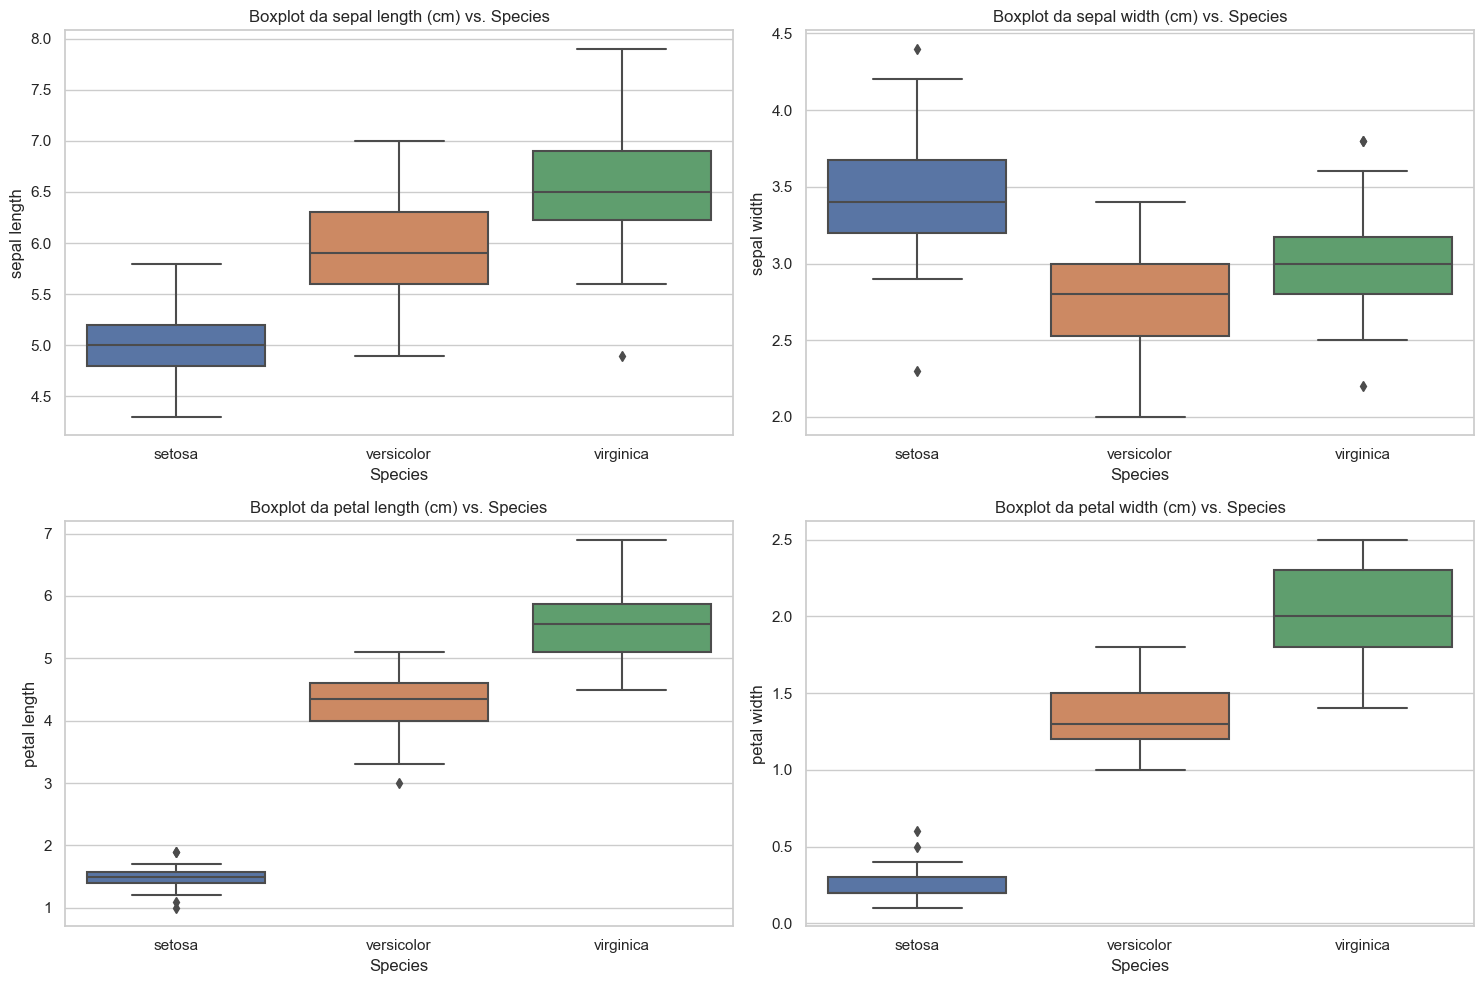

In [16]:
# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar um boxplot para cada variável em relação à espécie
for i, column in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=iris_df)
    plt.title(f'Boxplot da {column} vs. Species')
    plt.xlabel('Species')
    plt.ylabel(column.replace(' (cm)', ''))

plt.tight_layout()
plt.show()

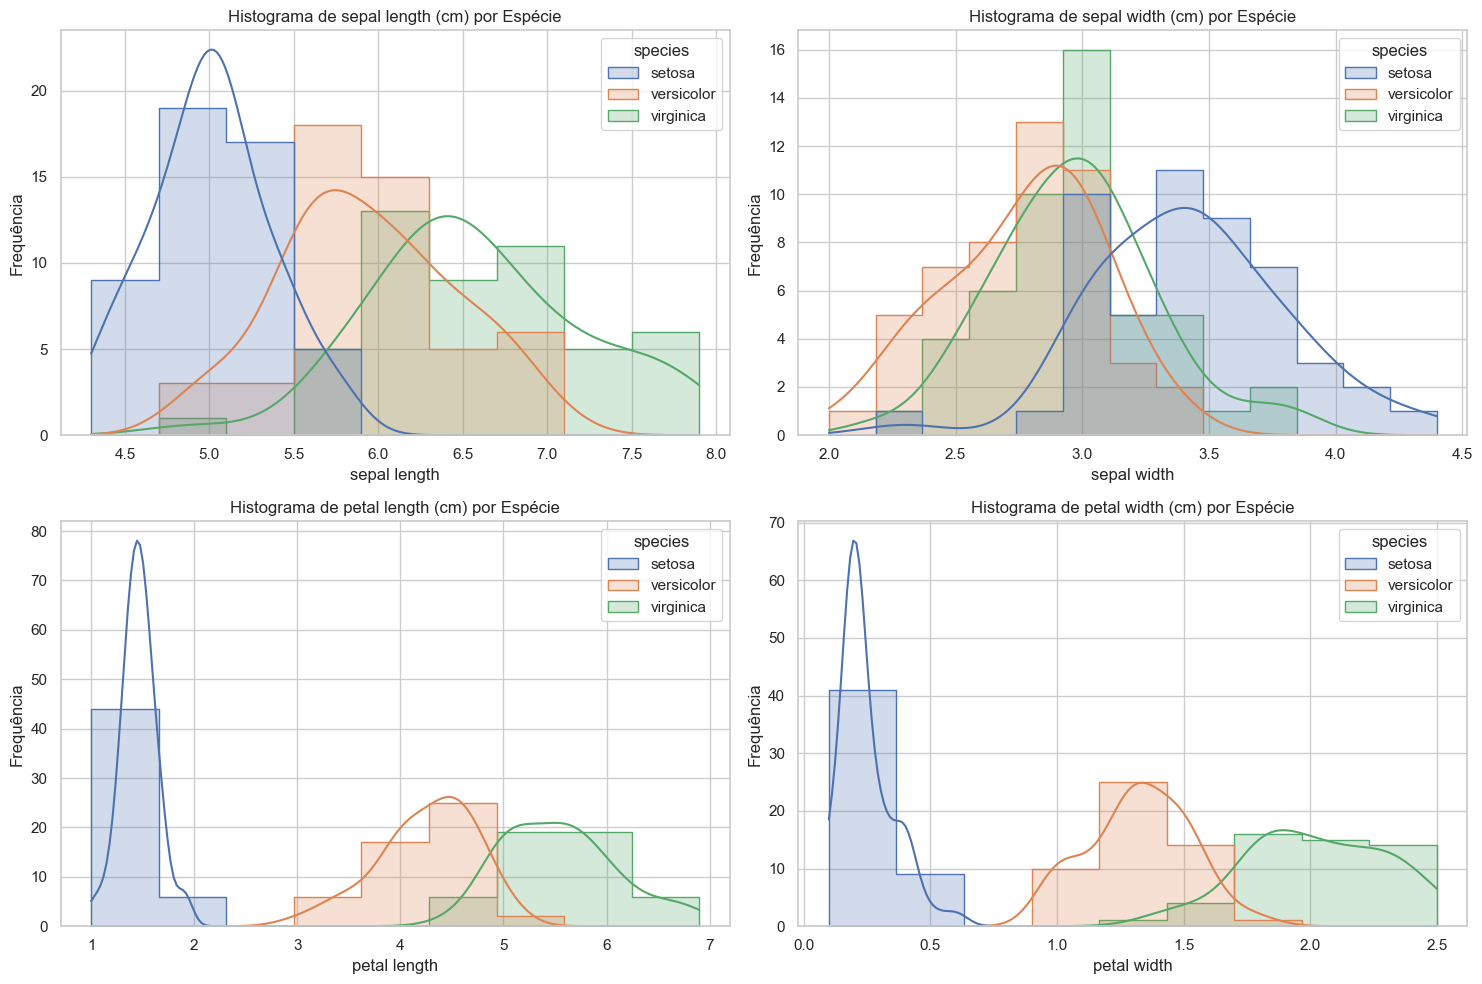

In [17]:
# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar um histograma para cada variável em relação à espécie
for i, column in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=iris_df, x=column, hue='species', kde=True, element='step')
    plt.title(f'Histograma de {column} por Espécie')
    plt.xlabel(column.replace(' (cm)', ''))
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

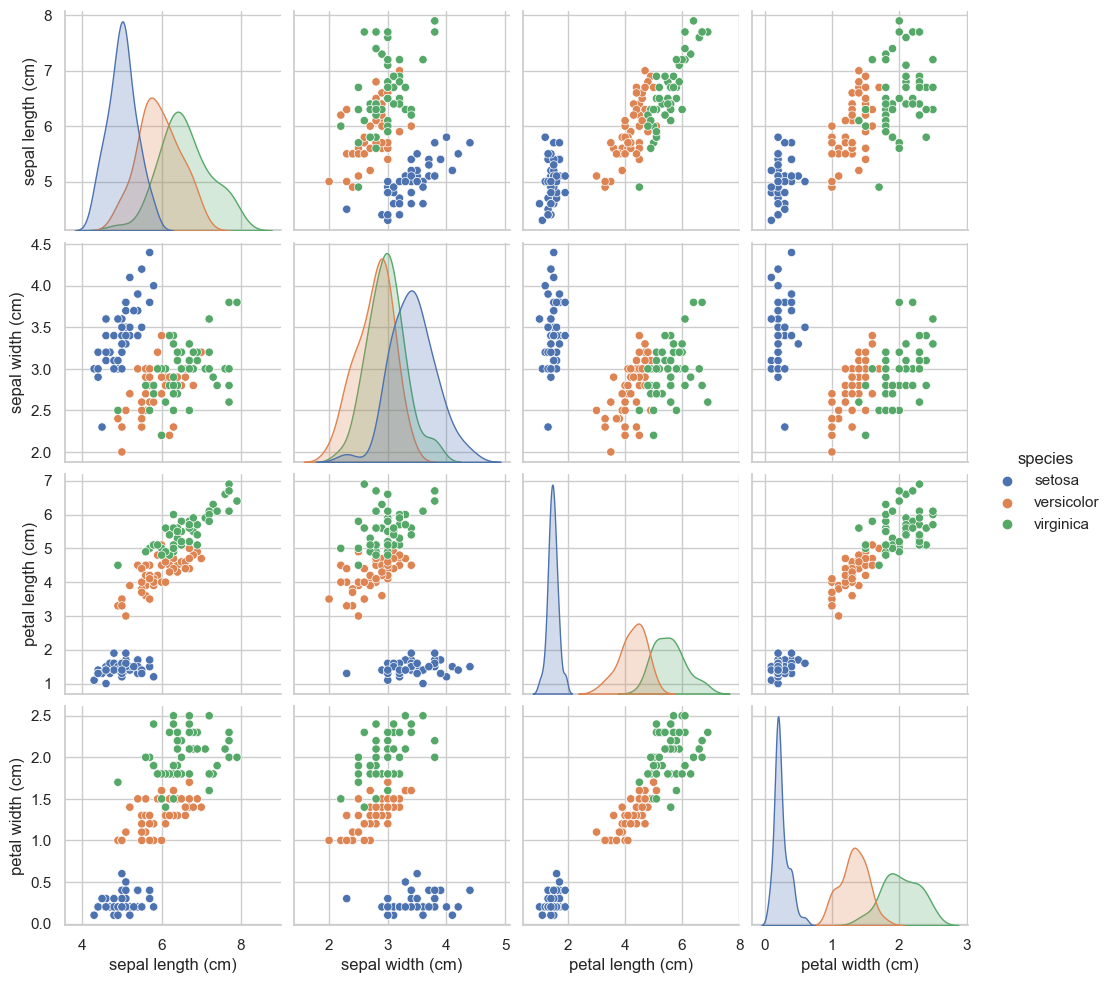

In [18]:
sns.pairplot(iris_df, hue='species')

### c. Somente olhando esses gráficos, é possível utilizando uma ou mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) que sejam suficientes para diferenciar entre as diferentes espécies?

### d. Aplique a regressão logística para avaliar o modelo de classificação.

In [53]:
# Dividir os dados em conjuntos de treino e teste
X = iris_df.drop('species', axis=1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)

In [54]:
# Ajustar o modelo de regressão logística
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [55]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

### e. Calcule a acurácia, precisão e recall.

In [56]:
# Calcular acurácia, precisão e recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [57]:
# Exibir os resultados
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Acurácia: 0.93
Precisão: 0.94
Recall: 0.93


### f. Plote a matriz de confusao com matplotlib ou seaborn

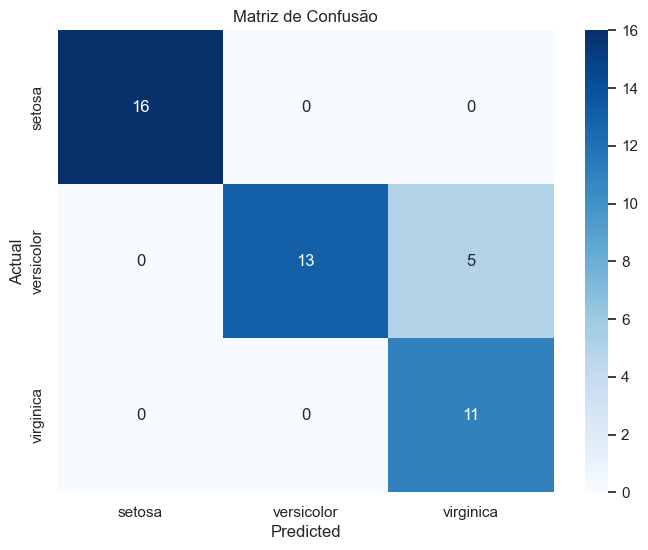

In [24]:
# Exibir a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

In [25]:
# Exibir o relatório de classificação completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.72      0.84        18
   virginica       0.69      1.00      0.81        11

    accuracy                           0.89        45
   macro avg       0.90      0.91      0.88        45
weighted avg       0.92      0.89      0.89        45



In [42]:
# Comparação dados de teste e treino
y_pred = model.predict(X_test)
comparar = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
comparar = comparar.reset_index(drop = True)
comparar[:21]

,Real,Previsto
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,virginica,virginica
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,versicolor,versicolor
9,versicolor,versicolor


### Dataset load_digits

In [44]:
digits = load_digits()
digits = pd.DataFrame(data=digits.data, columns=digits.feature_names)
#digits['target'] = digits.target
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [45]:
num_samples = digits.shape[0]
num_features = digits.shape[1] - 1  # Excluindo a coluna 'target'

print(f"Quantidade de amostras: {num_samples}")
print(f"Quantidade de características (features): {num_features}")

Quantidade de amostras: 1797
Quantidade de características (features): 63


In [46]:
# 2. Verificar se existem dados nulos
null_data = digits.isnull().sum().sum()
print(f"Existem dados nulos? {'Sim' if null_data > 0 else 'Não'}")

Existem dados nulos? Não


In [47]:
digits.isnull().sum()
print(f"Existem dados nulos? {'Sim' if null_data > 0 else 'Não'}")

Existem dados nulos? Não


In [48]:
data_types = digits.dtypes
print("\nTipos de dados nas colunas:")
print(data_types)


Tipos de dados nas colunas:
pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_3    float64
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
Length: 64, dtype: object


In [49]:
import numpy as np
# Verificar se existem colunas não numéricas
non_numeric_columns = digits.select_dtypes(exclude=[np.number]).columns
print(f"\nColunas com dados não numéricos: {non_numeric_columns.tolist() if len(non_numeric_columns) > 0 else 'Nenhuma'}")


Colunas com dados não numéricos: Nenhuma


In [50]:
digits.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

In [51]:
digits.data.shape

AttributeError: 'DataFrame' object has no attribute 'data'

In [52]:
digits.target.shape

AttributeError: 'DataFrame' object has no attribute 'target'

In [ ]:
digits = load_digits()

In [ ]:
X = digits.data
y = digits.target

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=10000)

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
# Calcular a acurácia, precisão e recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [ ]:
# Exibir os resultados
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

In [ ]:
# Exibir o relatório de classificação completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()